# Data Cleaning

### Load data

In [12]:
import pandas as pd

# Load the merged and deduplicated data
df = pd.read_csv('data/merged/merged_data_deduplicated.csv')

# Display the first few rows and basic information about the DataFrame
print("First few rows of the data:")
display(df.head())

print("\nDataset information:")
display(df.info())

First few rows of the data:


,video_id,author,description,likes,comments,shares,plays,hashtags,music,create_time,video_url,fetch_time,views,posted_time
0,7506183500660313390,dalebrisby90,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...",44800,125,1863,686000.0,"rodeotime, dalebrisby, jbmauney",original sound,2025-05-19 15:45:53,https://www.tiktok.com/@dalebrisby90/video/750...,NaN,NaN,NaN
1,7507316543605280030,jessicafloriolli,thanks for sticking around @Alonzofloriolli,285700,290,963,1200000.0,NaN,ECE Marketing Airball,2025-05-22 17:02:36,https://www.tiktok.com/@jessicafloriolli/video...,NaN,NaN,NaN
2,7507286333505719582,ay_2fya,#publicinterview #fyp #rizz,38000,65,496,416100.0,"publicinterview, fyp, rizz",original sound,2025-05-22 15:05:21,https://www.tiktok.com/@ay_2fya/video/75072863...,NaN,NaN,NaN
3,7506662216574209310,abell1823,Boat days hit different ✨,87200,259,23600,725800.0,NaN,If You Were Mine,2025-05-20 22:43:34,https://www.tiktok.com/@abell1823/video/750666...,NaN,NaN,NaN
4,7506628206280363310,jordanmarielynnxoxo,a lululemonnnn. #prettygirl #foryoupage #trend...,77600,724,1196,362100.0,"prettygirl, foryoupage, trending, likes",What Da Fuk,2025-05-20 20:32:12,https://www.tiktok.com/@jordanmarielynnxoxo/vi...,NaN,NaN,NaN



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   video_id     7225 non-null   int64  
 1   author       7225 non-null   object 
 2   description  6533 non-null   object 
 3   likes        7225 non-null   int64  
 4   comments     7225 non-null   int64  
 5   shares       7225 non-null   int64  
 6   plays        7218 non-null   float64
 7   hashtags     5150 non-null   object 
 8   music        7225 non-null   object 
 9   create_time  7218 non-null   object 
 10  video_url    7225 non-null   object 
 11  fetch_time   7 non-null      object 
 12  views        7 non-null      float64
 13  posted_time  7 non-null      object 
dtypes: float64(2), int64(4), object(8)
memory usage: 790.4+ KB


None

### Null check

Null value analysis:


,Null Count,Null Percentage
video_id,0,0.00
author,0,0.00
description,692,9.58
likes,0,0.00
comments,0,0.00
shares,0,0.00
plays,7,0.10
hashtags,2075,28.72
music,0,0.00
create_time,7,0.10


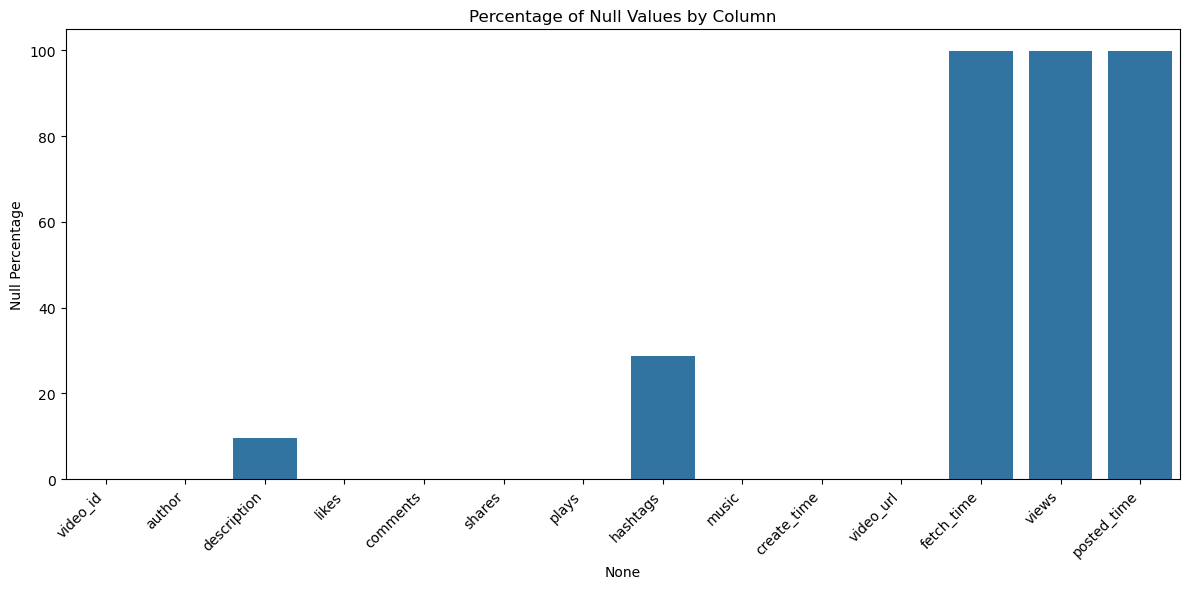

In [13]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display null value information
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

print("Null value analysis:")
display(null_info)

# Visualize null values distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=null_info.index, y='Null Percentage', data=null_info)
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Null Values by Column')
plt.tight_layout()
plt.show()

### Merge columns
- posted_time -> create_time
- views -> plays

In [14]:
# Fill create_time with posted_time where create_time is null
df['create_time'] = df['create_time'].fillna(df['posted_time'])

# Fill plays with views where plays is null
df['plays'] = df['plays'].fillna(df['views'])

# Drop the redundant columns since we've merged them
df = df.drop(['posted_time', 'views'], axis=1)

print("Checking columns after merging:")
print("\nNull values in create_time:", df['create_time'].isnull().sum())
print("Null values in plays:", df['plays'].isnull().sum())
print("\nFirst few rows of merged columns:")
display(df[['video_id', 'create_time', 'plays']].head())

Checking columns after merging:

Null values in create_time: 0
Null values in plays: 0

First few rows of merged columns:


,video_id,create_time,plays
0,7506183500660313390,2025-05-19 15:45:53,686000.0
1,7507316543605280030,2025-05-22 17:02:36,1200000.0
2,7507286333505719582,2025-05-22 15:05:21,416100.0
3,7506662216574209310,2025-05-20 22:43:34,725800.0
4,7506628206280363310,2025-05-20 20:32:12,362100.0


In [15]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display null value information
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

print("Null value analysis after merged posted_time and create_time:")
display(null_info)

Null value analysis after merged posted_time and create_time:


,Null Count,Null Percentage
video_id,0,0.00
author,0,0.00
description,692,9.58
likes,0,0.00
comments,0,0.00
shares,0,0.00
plays,0,0.00
hashtags,2075,28.72
music,0,0.00
create_time,0,0.00


### Handle Null Values

Handle null values in:
1. description (9.58% null) - Fill with "No description"
2. hashtags (28.72% null) - Fill with empty list []
3. fetch_time (99.90% null) - Drop this column as it has too many null values and isn't critical

In [16]:
# Handle description nulls
df['description'] = df['description'].fillna('No description')

# Handle hashtags nulls - replace with empty list
df['hashtags'] = df['hashtags'].fillna('[]')

# Drop fetch_time column as it has too many nulls (99.90%)
df = df.drop('fetch_time', axis=1)

# Verify the changes
print("Null values after preprocessing:")
display(df.isnull().sum())

# Display sample of processed data
print("\nSample of processed data:")
display(df[['description', 'hashtags']].head())

# Verify column list
print("\nRemaining columns:")
display(df.columns.tolist())

Null values after preprocessing:


video_id       0
author         0
description    0
likes          0
comments       0
shares         0
plays          0
hashtags       0
music          0
create_time    0
video_url      0
dtype: int64


Sample of processed data:


,description,hashtags
0,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...","rodeotime, dalebrisby, jbmauney"
1,thanks for sticking around @Alonzofloriolli,[]
2,#publicinterview #fyp #rizz,"publicinterview, fyp, rizz"
3,Boat days hit different ✨,[]
4,a lululemonnnn. #prettygirl #foryoupage #trend...,"prettygirl, foryoupage, trending, likes"



Remaining columns:


['video_id',
 'author',
 'description',
 'likes',
 'comments',
 'shares',
 'plays',
 'hashtags',
 'music',
 'create_time',
 'video_url']

In [17]:
# Check for remaining null values in important columns
print("Checking remaining nulls in key engagement columns:")
engagement_cols = ['likes', 'comments', 'shares', 'plays']
display(df[engagement_cols].isnull().sum())

# Fill remaining nulls in engagement metrics with zeros
# This assumes that missing engagement data means no engagement
for col in engagement_cols:
    null_count_before = df[col].isnull().sum()
    if null_count_before > 0:
        df[col] = df[col].fillna(0)
        print(f"Filled {null_count_before} nulls in {col} with zeros")

# Verify no nulls remain in these columns
print("\nVerifying nulls after filling:")
display(df[engagement_cols].isnull().sum())

Checking remaining nulls in key engagement columns:


likes       0
comments    0
shares      0
plays       0
dtype: int64


Verifying nulls after filling:


likes       0
comments    0
shares      0
plays       0
dtype: int64

### Text Cleaning and Hashtag Processing

In [18]:
# Download NLTK resources (only need to run once)
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [19]:
import re
from nltk.corpus import stopwords
import numpy as np
import emoji

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove emojis (using emoji library)
    text = emoji.replace_emoji(text, '')
    
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert to lowercase
    text = text.lower().strip()
    
    # For sentiment analysis, we keep stopwords as they carry sentiment information
    # Examples: "not good", "very nice", "but terrible"
    
    return text

# Clean description column
df['clean_description'] = df['description'].apply(clean_text)

# Parse hashtags from the string representation
def parse_hashtags(hashtags_str):
    if not isinstance(hashtags_str, str) or hashtags_str == '[]':
        return []
    
    # Extract hashtags - they're usually comma-separated
    tags = [tag.strip() for tag in hashtags_str.split(',')]
    
    # Clean up the tags
    clean_tags = []
    for tag in tags:
        # Remove quotes, brackets, etc.
        tag = re.sub(r'[^\w\s]', '', tag).strip()
        if tag:  # Only add non-empty tags
            clean_tags.append(tag)
    
    return clean_tags

# Process hashtags
df['hashtag_list'] = df['hashtags'].apply(parse_hashtags)
df['hashtag_count'] = df['hashtag_list'].apply(len)

# Display examples of cleaned text
print("Examples of cleaned description:")
display(pd.DataFrame({
    'Original': df['description'].head(3),
    'Cleaned': df['clean_description'].head(3)
}))

print("\nExamples of processed hashtags:")
display(pd.DataFrame({
    'Original': df['hashtags'].head(3),
    'Processed': df['hashtag_list'].head(3),
    'Count': df['hashtag_count'].head(3)
}))

Examples of cleaned description:


,Original,Cleaned
0,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...",that sounds like jb ima go with truth rodeoti...
1,thanks for sticking around @Alonzofloriolli,thanks for sticking around alonzofloriolli
2,#publicinterview #fyp #rizz,publicinterview fyp rizz



Examples of processed hashtags:


,Original,Processed,Count
0,"rodeotime, dalebrisby, jbmauney","[rodeotime, dalebrisby, jbmauney]",3
1,[],[],0
2,"publicinterview, fyp, rizz","[publicinterview, fyp, rizz]",3


### Process Timestamps and Create Time Features
Convert create_time to datetime and extract useful time features

Time feature examples:


,create_time,create_hour,day_of_week,is_weekend,time_period
0,2025-05-19 15:45:53,15,0,0,afternoon
1,2025-05-22 17:02:36,17,3,0,evening
2,2025-05-22 15:05:21,15,3,0,afternoon
3,2025-05-20 22:43:34,22,1,0,night
4,2025-05-20 20:32:12,20,1,0,evening


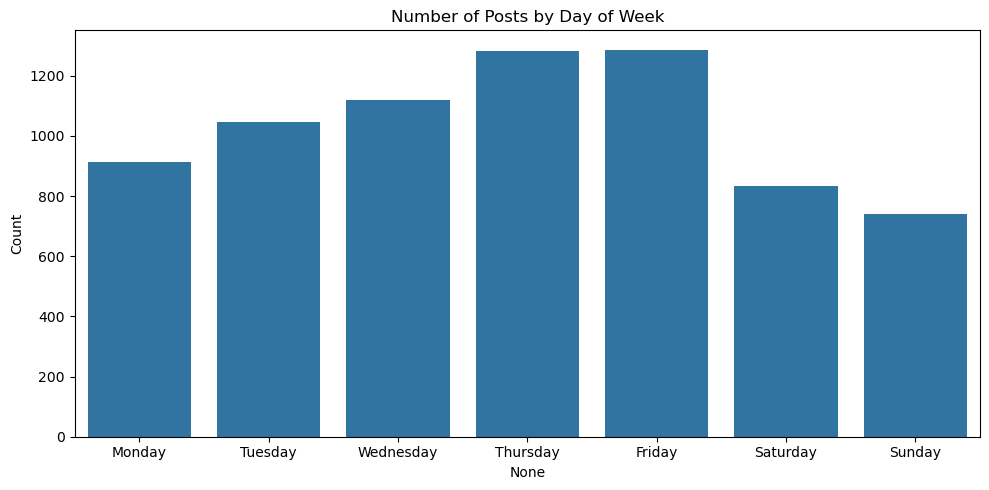

In [21]:
# Convert create_time to datetime
df['create_time'] = pd.to_datetime(df['create_time'], errors='coerce')

# Extract time features
df['create_hour'] = df['create_time'].dt.hour
df['create_day'] = df['create_time'].dt.day
df['create_month'] = df['create_time'].dt.month
df['create_year'] = df['create_time'].dt.year
df['day_of_week'] = df['create_time'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# Create time period category
def get_time_period(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 22:
        return 'evening'
    else:
        return 'night'

df['time_period'] = df['create_hour'].apply(get_time_period)

# Display results
print("Time feature examples:")
display(df[['create_time', 'create_hour', 'day_of_week', 'is_weekend', 'time_period']].head())

# Count posts by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().sort_index()
day_counts.index = [day_names[i] for i in day_counts.index]

# Visualize posts by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Number of Posts by Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Engagement Metrics
Create engagement metrics to quantify video performance

Engagement metrics examples:


,video_id,total_engagement,engagement_rate_per_play
0,7506183500660313390,46788,0.068204
1,7507316543605280030,286953,0.239127
2,7507286333505719582,38561,0.092672
3,7506662216574209310,111059,0.153016
4,7506628206280363310,79520,0.219608



Engagement metrics summary statistics:


,total_engagement,engagement_rate_per_play
count,7.225000e+03,7225.000000
mean,2.331798e+05,0.143919
std,4.526510e+05,0.081601
min,2.228000e+03,0.000809
25%,5.831700e+04,0.079482
50%,1.156800e+05,0.130383
75%,2.402000e+05,0.197989
max,1.412970e+07,0.463486


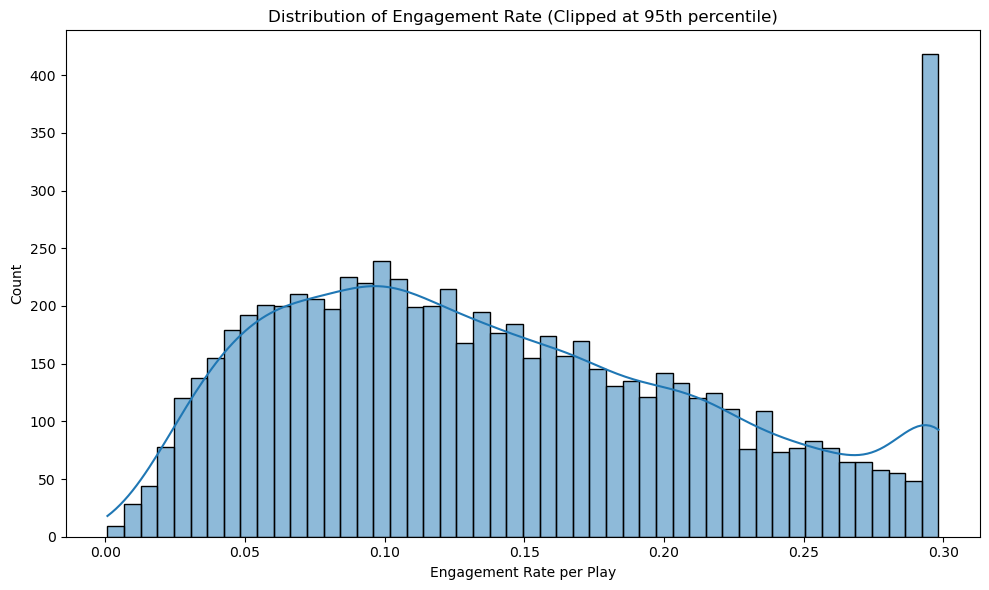

In [22]:
# Convert engagement metrics to numeric (if they aren't already)
import numpy as np
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')
df['plays'] = pd.to_numeric(df['plays'], errors='coerce')

# Calculate total engagement
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']

# Calculate engagement rate (based on plays since we don't have follower count)
df['engagement_rate_per_play'] = df['total_engagement'] / df['plays']
df['engagement_rate_per_play'] = df['engagement_rate_per_play'].fillna(0).replace([np.inf, -np.inf], 0)

# Display engagement metrics
print("Engagement metrics examples:")
engagement_cols = ['video_id', 'total_engagement', 'engagement_rate_per_play']
display(df[engagement_cols].head())

# Basic summary statistics for engagement metrics
print("\nEngagement metrics summary statistics:")
display(df[['total_engagement', 'engagement_rate_per_play']].describe())

# Visualize distribution of engagement rate
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_rate_per_play'].clip(upper=df['engagement_rate_per_play'].quantile(0.95)), 
             bins=50, kde=True)
plt.title('Distribution of Engagement Rate (Clipped at 95th percentile)')
plt.xlabel('Engagement Rate per Play')
plt.tight_layout()
plt.show()

## Outlier Detection and Handling
Identify and manage outliers in engagement metrics

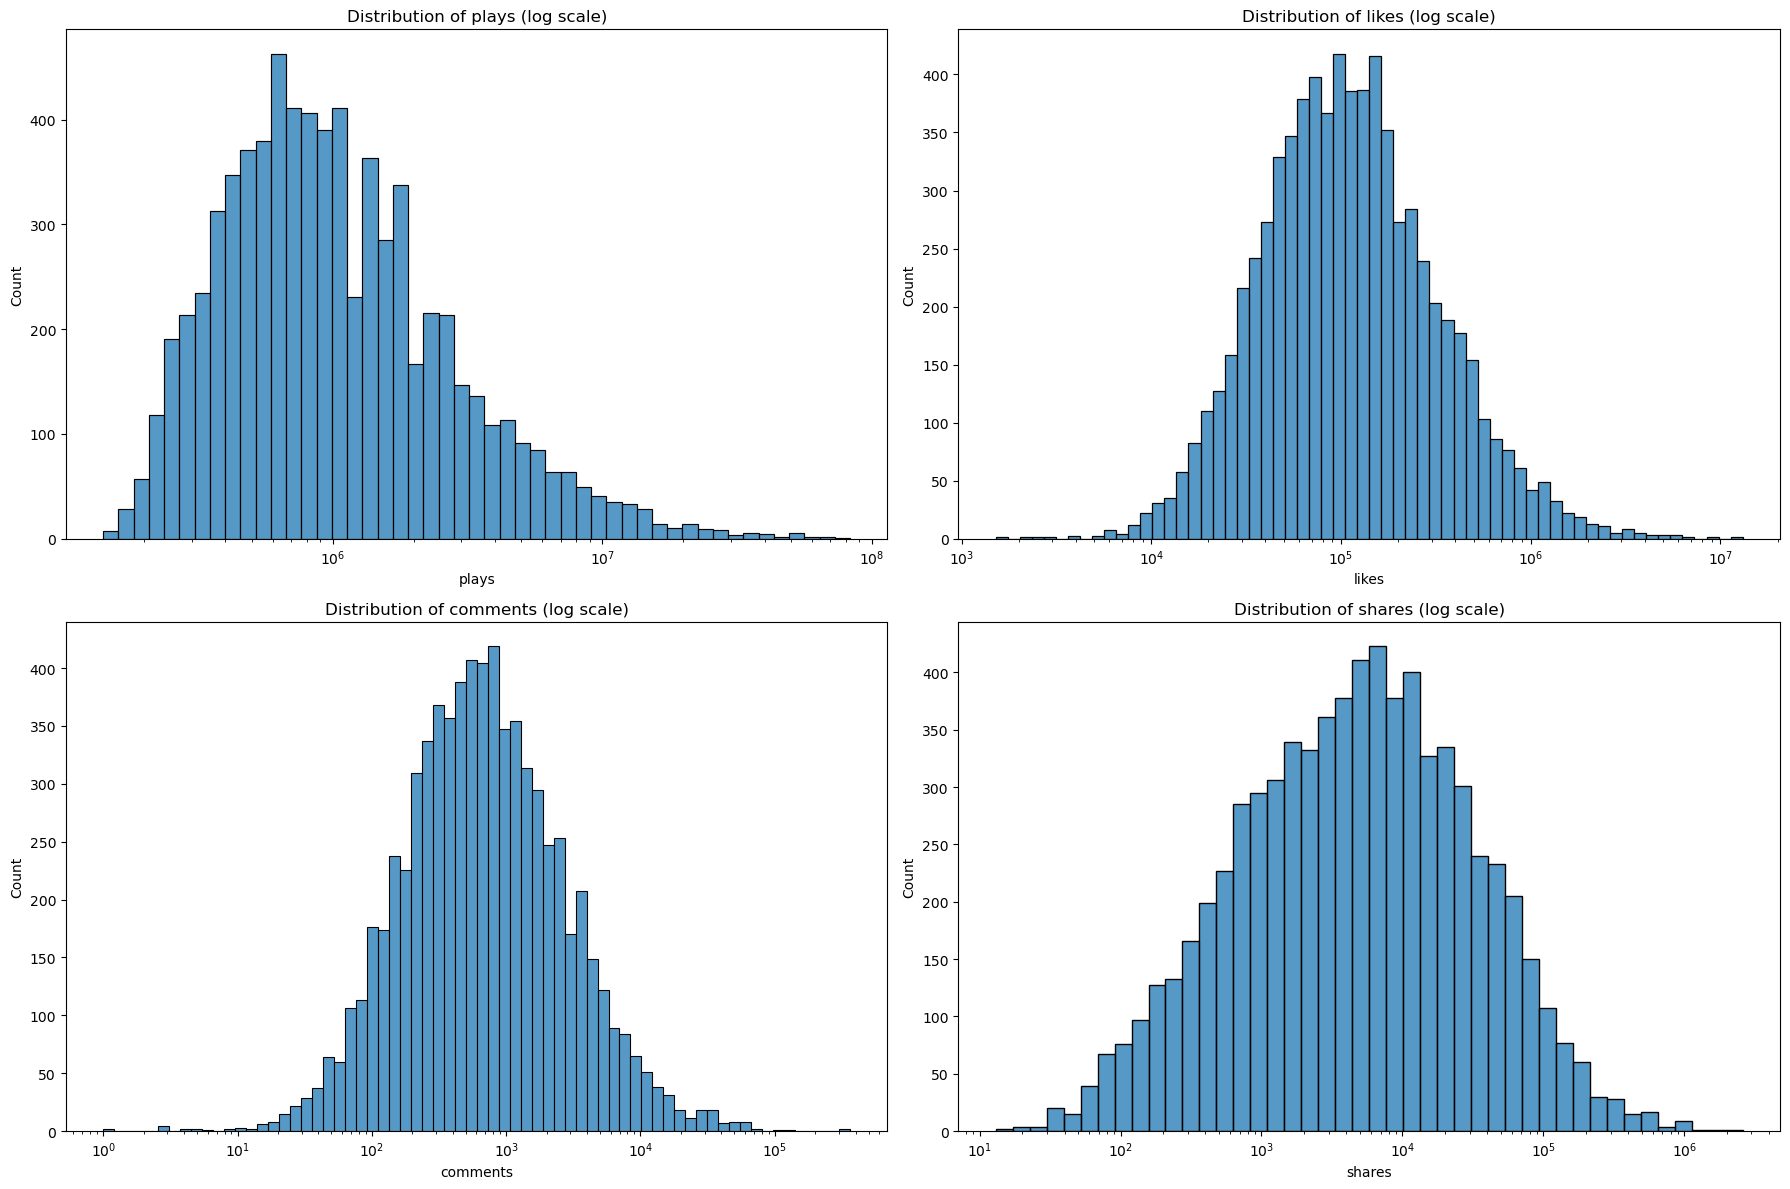

Outlier Analysis:
Outliers in plays: 768 (10.63%)
  - Range: -1433000.00 to 3739800.00
  - Min: 140800.00, Max: 83100000.00
Outliers in likes: 674 (9.33%)
  - Range: -192750.00 to 461250.00
  - Min: 1514.00, Max: 13100000.00
Outliers in comments: 794 (10.99%)
  - Range: -1812.50 to 3719.50
  - Min: 0.00, Max: 364300.00
Outliers in shares: 893 (12.36%)
  - Range: -23680.00 to 42528.00
  - Min: 13.00, Max: 2600000.00
Outliers in total_engagement: 678 (9.38%)
  - Range: -214507.50 to 513024.50
  - Min: 2228.00, Max: 14129700.00
Outliers in engagement_rate_per_play: 37 (0.51%)
  - Range: -0.10 to 0.38
  - Min: 0.00, Max: 0.46


C:\Users\USER\AppData\Local\Temp\ipykernel_17316\811669978.py:61: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[capped_column] = df[metric].clip(upper=cap_value)
C:\Users\USER\AppData\Local\Temp\ipykernel_17316\811669978.py:61: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[capped_column] =

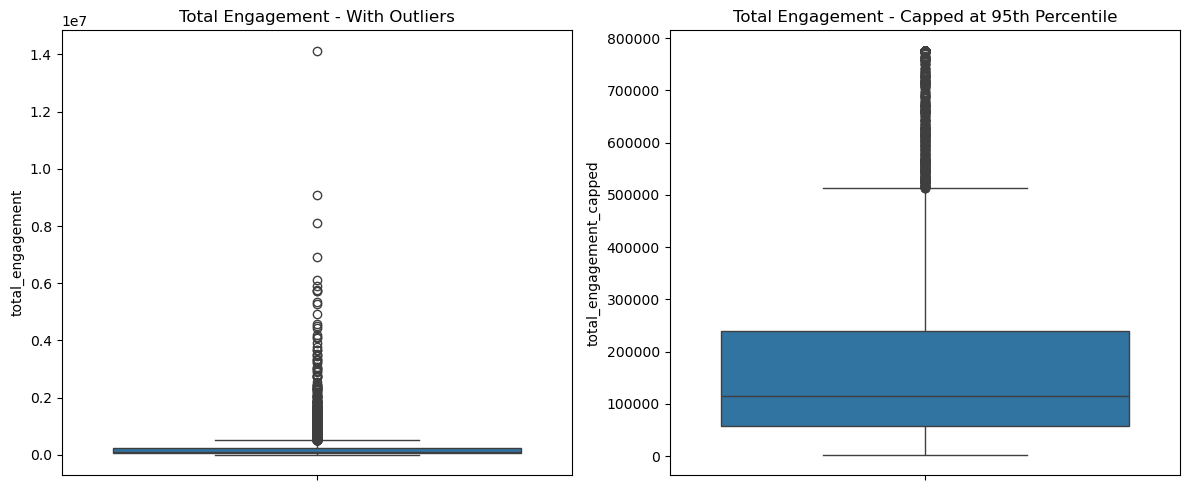


Outlier handling summary:
Viral videos (high plays): 145 (2.01%)
Highly engaging videos: 145 (2.01%)
Created capped versions of metrics for analysis purposes


In [23]:
# Identify outliers in key metrics
outlier_metrics = ['plays', 'likes', 'comments', 'shares', 'total_engagement', 'engagement_rate_per_play']

# First, visualize distributions of these metrics to understand outlier patterns
plt.figure(figsize=(18, 12))
for i, metric in enumerate(outlier_metrics[:4]):  # First 4 metrics
    plt.subplot(2, 2, i+1)
    
    # Plot histogram with log scale for better visibility
    sns.histplot(df[metric], kde=False, log_scale=True)
    
    plt.title(f'Distribution of {metric} (log scale)')
    plt.tight_layout()
plt.show()

# Function to identify and flag outliers using IQR method
def flag_outliers(df, column, outlier_cutoff=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - outlier_cutoff * IQR
    upper_bound = Q3 + outlier_cutoff * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)} ({len(outliers)/len(df):.2%})")
    print(f"  - Range: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"  - Min: {df[column].min():.2f}, Max: {df[column].max():.2f}")
    
    return outliers.index

# Identify outliers in key metrics
print("Outlier Analysis:")
for metric in outlier_metrics:
    flag_outliers(df, metric)

# Create a flag for extreme outliers in engagement metrics
# Instead of removing, we'll flag them for potential separate analysis

# For plays (views) - flag top 2% as viral
df['is_viral_plays'] = (df['plays'] > df['plays'].quantile(0.98)).astype(int)

# For engagement_rate - flag top 2% as extremely engaging
df['is_highly_engaging'] = (df['engagement_rate_per_play'] > 
                            df['engagement_rate_per_play'].quantile(0.98)).astype(int)

# For negative plays or engagement metrics - these are likely errors
# Handle by setting them to appropriate values
for metric in ['plays', 'likes', 'comments', 'shares']:
    negative_count = (df[metric] < 0).sum()
    if negative_count > 0:
        print(f"Found {negative_count} negative values in {metric}, setting to 0")
        df[metric] = df[metric].clip(lower=0)

# Create a version with capped outliers for analysis 
# (keeps original values but provides capped versions for modeling)
for metric in outlier_metrics:
    capped_column = f"{metric}_capped"
    cap_value = df[metric].quantile(0.95)  # Cap at 95th percentile
    df[capped_column] = df[metric].clip(upper=cap_value)

# Visualize original vs capped values for one metric
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['total_engagement'])
plt.title('Total Engagement - With Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['total_engagement_capped'])
plt.title('Total Engagement - Capped at 95th Percentile')

plt.tight_layout()
plt.show()

# Summary of outlier handling
print("\nOutlier handling summary:")
print(f"Viral videos (high plays): {df['is_viral_plays'].sum()} ({df['is_viral_plays'].mean():.2%})")
print(f"Highly engaging videos: {df['is_highly_engaging'].sum()} ({df['is_highly_engaging'].mean():.2%})")
print("Created capped versions of metrics for analysis purposes")


## Enhanced Engagement Metrics
Calculate more sophisticated engagement metrics for deeper analysis

Validation of normalized metrics:

engagement_rate_per_play:
Original range: [0.0008, 0.4635]
Normalized range (0-1): [0.0000, 1.0000]

weighted_engagement_rate:
Original range: [0.0017, 3.0596]
Normalized range (0-1): [0.0000, 1.0000]

viral_coefficient:
Original range: [0.0003, 0.2831]
Normalized range (0-1): [0.0000, 1.0000]
Normalized metrics examples (0-1 scale):


,video_id,engagement_rate_per_play_norm,weighted_engagement_rate_norm,viral_coefficient_norm
0,7506183500660313390,0.145664,0.029969,0.076232
1,7507316543605280030,0.515087,0.080312,0.254183
2,7507286333505719582,0.198548,0.033452,0.099473
3,7506662216574209310,0.328971,0.145642,0.218992
4,7506628206280363310,0.472898,0.083587,0.239143



Summary statistics of normalized metrics:


,engagement_rate_per_play_norm,weighted_engagement_rate_norm,viral_coefficient_norm
count,7225.000000,7225.000000,7225.000000
mean,0.309308,0.084458,0.174297
std,0.176368,0.069784,0.105486
min,0.000000,0.000000,0.000000
25%,0.170040,0.035785,0.092129
50%,0.280052,0.064280,0.154187
75%,0.426173,0.113324,0.239143
max,1.000000,1.000000,1.000000


Enhanced engagement metrics examples:


,video_id,weighted_engagement,weighted_engagement_rate,commenting_rate,sharing_rate,viral_coefficient,viral_coefficient_norm
0,7506183500660313390,64055,0.093375,0.000182,0.002716,0.021856,0.076232
1,7507316543605280030,296780,0.247317,0.000242,0.000803,0.072188,0.254183
2,7507286333505719582,43285,0.104025,0.000156,0.001192,0.028429,0.099473
3,7506662216574209310,324495,0.447086,0.000357,0.032516,0.062234,0.218992
4,7506628206280363310,93180,0.257332,0.001999,0.003303,0.067934,0.239143



Summary statistics of enhanced metrics:


,weighted_engagement,weighted_engagement_rate,commenting_rate,sharing_rate,viral_coefficient,viral_coefficient_norm
count,7.225000e+03,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000
mean,4.466468e+05,0.259995,0.001430,0.012262,0.049592,0.174297
std,1.041804e+06,0.213390,0.003912,0.017808,0.029836,0.105486
min,4.853000e+03,0.001733,0.000000,0.000003,0.000294,0.000000
25%,8.289500e+04,0.111160,0.000303,0.001321,0.026352,0.092129
50%,1.831000e+05,0.198292,0.000623,0.005047,0.043904,0.154187
75%,4.261750e+05,0.348264,0.001302,0.015930,0.067934,0.239143
max,2.761810e+07,3.059600,0.121206,0.285714,0.283137,1.000000


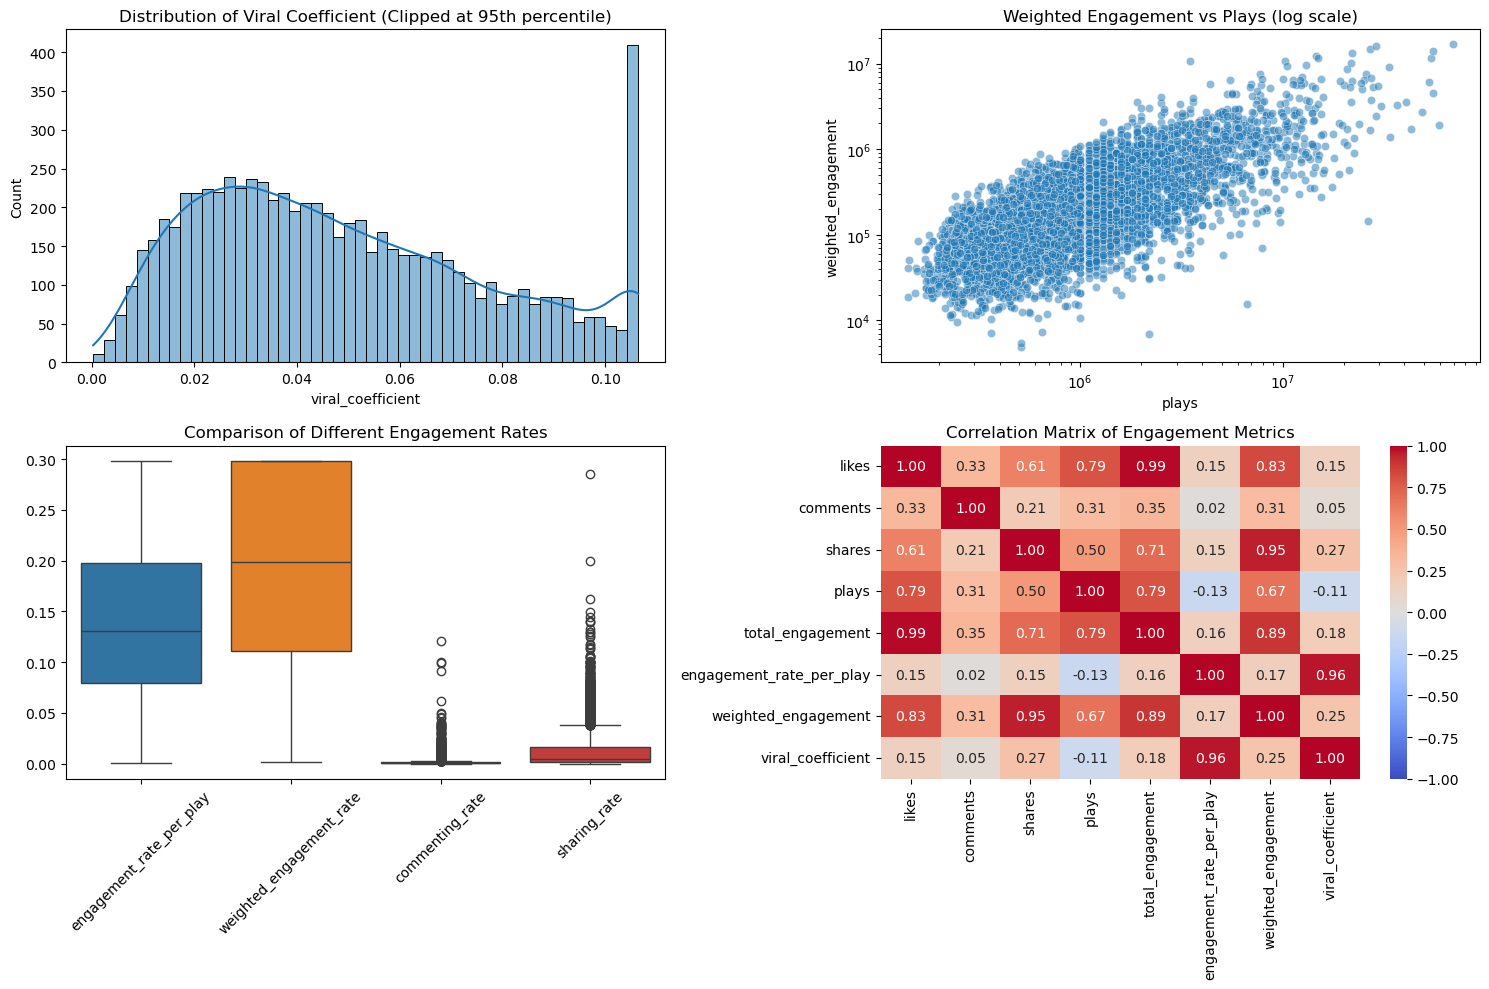

In [35]:
# Enhanced engagement metrics

# 1. Weighted Engagement Score
# Assign different weights to different types of engagement
# Comments are typically more valuable than likes, shares even more so
df['weighted_engagement'] = df['likes'] + (df['comments'] * 5) + (df['shares'] * 10)

# 2. Weighted Engagement Rate
df['weighted_engagement_rate'] = df['weighted_engagement'] / df['plays']
df['weighted_engagement_rate'] = df['weighted_engagement_rate'].fillna(0).replace([np.inf, -np.inf], 0)

# 3. Commenting Rate (comments per play)
df['commenting_rate'] = df['comments'] / df['plays']
df['commenting_rate'] = df['commenting_rate'].fillna(0).replace([np.inf, -np.inf], 0)

# 4. Sharing Rate (shares per play)
df['sharing_rate'] = df['shares'] / df['plays']
df['sharing_rate'] = df['sharing_rate'].fillna(0).replace([np.inf, -np.inf], 0)

# 5. Viral Coefficient (estimated spread factor)
# Higher sharing rate likely leads to higher viral potential
df['viral_coefficient'] = (0.5 * df['sharing_rate']) + (0.3 * df['engagement_rate_per_play']) + (0.2 * df['commenting_rate'])

# 6. Normalize metrics (0-1 scale)
def min_max_scale_01(series):
    return (series - series.min()) / (series.max() - series.min())

for metric in ['engagement_rate_per_play', 'weighted_engagement_rate', 'viral_coefficient']:
    # Normalize to 0-1 scale
    norm_col = f"{metric}_norm"
    df[norm_col] = min_max_scale_01(df[metric])

# Validate normalized metrics
print("Validation of normalized metrics:")
for metric in ['engagement_rate_per_play', 'weighted_engagement_rate', 'viral_coefficient']:
    norm_col = f"{metric}_norm"
    
    print(f"\n{metric}:")
    print(f"Original range: [{df[metric].min():.4f}, {df[metric].max():.4f}]")
    print(f"Normalized range (0-1): [{df[norm_col].min():.4f}, {df[norm_col].max():.4f}]")

# Display examples of normalized metrics
print("Normalized metrics examples (0-1 scale):")
norm_metrics = []
for metric in ['engagement_rate_per_play', 'weighted_engagement_rate', 'viral_coefficient']:
    norm_metrics.append(f"{metric}_norm")
    
display(df[['video_id'] + norm_metrics].head())

print("\nSummary statistics of normalized metrics:")
display(df[norm_metrics].describe())

# Display enhanced metrics
print("Enhanced engagement metrics examples:")
enhanced_metrics = ['weighted_engagement', 'weighted_engagement_rate', 'commenting_rate', 
                    'sharing_rate', 'viral_coefficient', 'viral_coefficient_norm']
display(df[['video_id'] + enhanced_metrics].head())

# Summary statistics of enhanced metrics
print("\nSummary statistics of enhanced metrics:")
display(df[enhanced_metrics].describe())

# Visualize key enhanced metrics
plt.figure(figsize=(15, 10))

# Plot viral coefficient distribution (clipped at 95th percentile)
plt.subplot(2, 2, 1)
sns.histplot(df['viral_coefficient'].clip(upper=df['viral_coefficient'].quantile(0.95)), 
             bins=50, kde=True)
plt.title('Distribution of Viral Coefficient (Clipped at 95th percentile)')

# Scatter plot of weighted engagement vs plays
plt.subplot(2, 2, 2)
sns.scatterplot(x='plays', y='weighted_engagement', data=df.sample(min(5000, len(df))), alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Weighted Engagement vs Plays (log scale)')

# Compare different engagement rates
plt.subplot(2, 2, 3)
rate_df = df[['engagement_rate_per_play', 'weighted_engagement_rate', 
              'commenting_rate', 'sharing_rate']].clip(upper=df['engagement_rate_per_play'].quantile(0.95))
sns.boxplot(data=rate_df)
plt.title('Comparison of Different Engagement Rates')
plt.xticks(rotation=45)

# Correlation matrix
plt.subplot(2, 2, 4)
corr_cols = ['likes', 'comments', 'shares', 'plays', 'total_engagement', 
             'engagement_rate_per_play', 'weighted_engagement', 'viral_coefficient']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()

plt.tight_layout()
plt.show()


## Text Feature Extraction for NLP
Extract meaningful features from text data for analysis

In [ ]:
%pip install wordcloud textstat textblob

Top 20 hashtags:


,Hashtag,Count
0,fyp,2091
1,viral,650
2,fypシ,458
3,foryoupage,441
4,foryou,381
5,trending,279
6,relatable,259
7,funny,228
8,tiktok,131
9,fypシviral,113


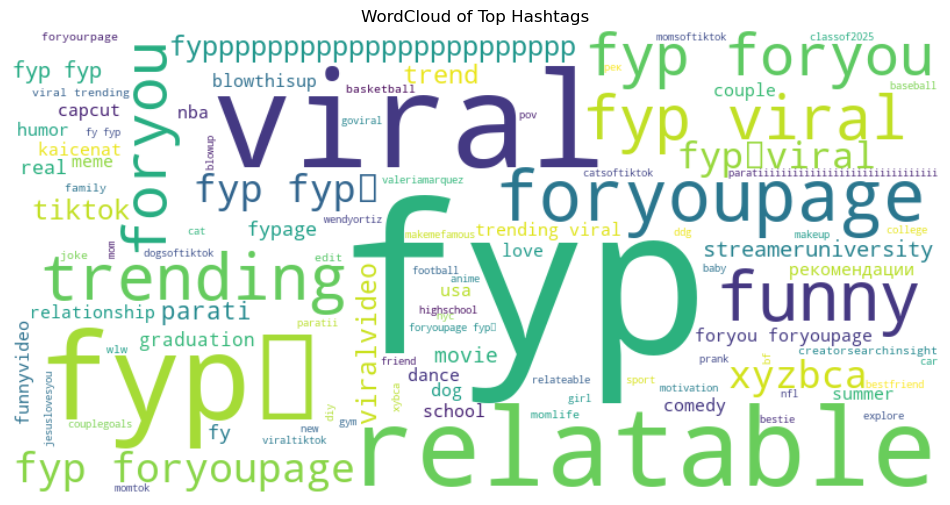

NLP feature examples:


,video_id,description,description_length,word_count,readability_score,sentiment_polarity,sentiment_subjectivity,has_question,has_exclamation,exclamation_count,hashtag_count
0,7506183500660313390,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...",76,11,85.888864,0.0,0.0,0,1,1,3
1,7507316543605280030,thanks for sticking around @Alonzofloriolli,44,5,15.640000,0.2,0.2,0,0,0,0
2,7507286333505719582,#publicinterview #fyp #rizz,28,3,34.590000,0.0,0.0,0,0,0,3
3,7506662216574209310,Boat days hit different ✨,25,4,75.875000,0.0,0.6,0,0,0,0
4,7506628206280363310,a lululemonnnn. #prettygirl #foryoupage #trend...,57,6,17.445000,0.0,0.0,0,0,0,4



NLP feature statistics:


,description_length,word_count,readability_score,sentiment_polarity,sentiment_subjectivity,has_question,has_exclamation,exclamation_count,hashtag_count
count,7225.000000,7225.000000,6997.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000
mean,97.303806,13.065329,44.524207,0.050656,0.212599,0.056747,0.088997,0.165813,4.083045
std,179.713812,27.683399,77.075283,0.225172,0.323134,0.231375,0.284758,0.673555,4.911822
min,1.000000,0.000000,-3178.180000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,31.545000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,8.000000,49.480000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,110.000000,14.000000,75.875000,0.000000,0.442857,0.000000,0.000000,0.000000,6.000000
max,4011.000000,738.000000,121.220000,1.000000,1.000000,1.000000,1.000000,14.000000,123.000000


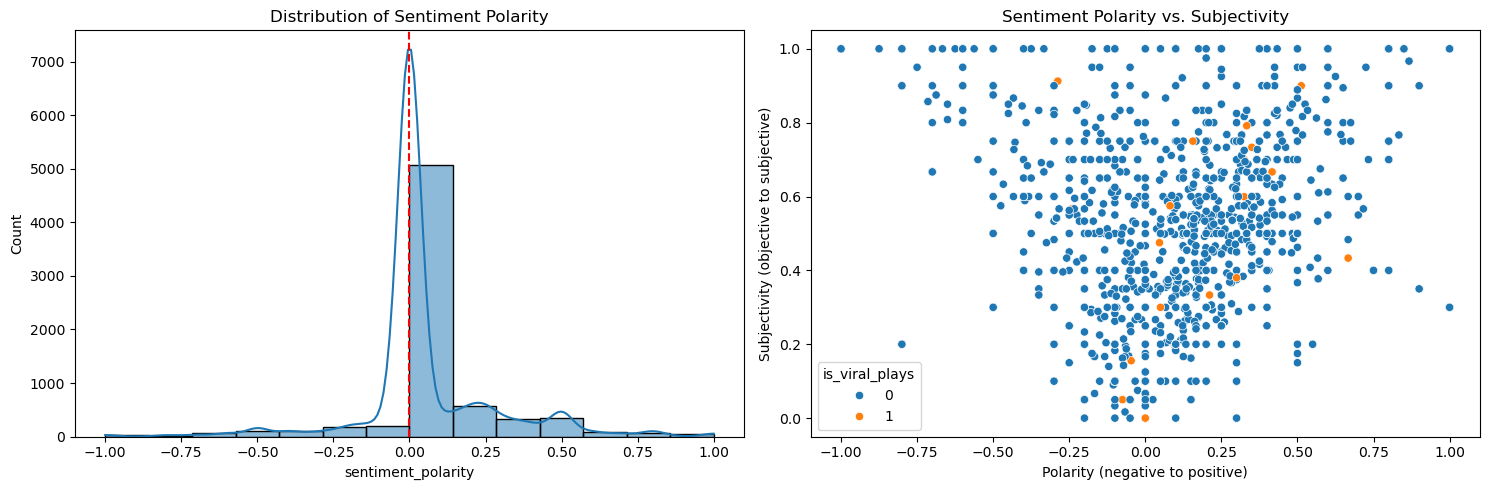

In [33]:
# NLP Feature Extraction

import textstat
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud

# 1. Description length features
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
df['word_count'] = df['clean_description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# 2. Text readability and complexity (using textstat)
def get_readability(text):
    if not isinstance(text, str) or len(text.strip()) < 10:
        return None
    return textstat.flesch_reading_ease(text)

df['readability_score'] = df['description'].apply(get_readability)

# 3. Sentiment analysis using TextBlob
def get_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0, 0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis to descriptions
sentiment_results = df['clean_description'].apply(get_sentiment)
df['sentiment_polarity'] = sentiment_results.apply(lambda x: x[0])
df['sentiment_subjectivity'] = sentiment_results.apply(lambda x: x[1])

# 4. Question and exclamation analysis
df['has_question'] = df['description'].apply(lambda x: 1 if isinstance(x, str) and '?' in x else 0)
df['has_exclamation'] = df['description'].apply(lambda x: 1 if isinstance(x, str) and '!' in x else 0)
df['exclamation_count'] = df['description'].apply(lambda x: x.count('!') if isinstance(x, str) else 0)

# 5. Most common hashtags
top_hashtags = Counter()
for hashtags in df['hashtag_list']:
    if isinstance(hashtags, list):
        top_hashtags.update(hashtags)

print("Top 20 hashtags:")
top_20_hashtags = dict(top_hashtags.most_common(20))
display(pd.DataFrame(list(top_20_hashtags.items()), columns=['Hashtag', 'Count']))

# 6. Create hashtag presence flags for top hashtags
for idx, (hashtag, count) in enumerate(top_hashtags.most_common(10)):
    col_name = f'has_tag_{hashtag}'
    df[col_name] = df['hashtag_list'].apply(lambda x: 1 if isinstance(x, list) and hashtag in x else 0)

# 7. Visualize hashtag word cloud
hash_string = ' '.join([' '.join(tags) for tags in df['hashtag_list'] if isinstance(tags, list)])

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(hash_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of Top Hashtags')
plt.axis('off')
plt.show()

# 8. Display NLP feature examples and stats
nlp_features = ['description_length', 'word_count', 'readability_score', 
                'sentiment_polarity', 'sentiment_subjectivity', 'has_question', 
                'has_exclamation', 'exclamation_count', 'hashtag_count']

print("NLP feature examples:")
display(df[['video_id', 'description'] + nlp_features].head())

print("\nNLP feature statistics:")
display(df[nlp_features].describe())

# 9. Visualize sentiment distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['sentiment_polarity'], kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.scatterplot(x='sentiment_polarity', y='sentiment_subjectivity', 
                hue='is_viral_plays', data=df.sample(min(5000, len(df))))
plt.title('Sentiment Polarity vs. Subjectivity')
plt.xlabel('Polarity (negative to positive)')
plt.ylabel('Subjectivity (objective to subjective)')

plt.tight_layout()
plt.show()

## Final Data Preparation and Export
Final preprocessing steps, feature selection, and data export

In [ ]:
# Final data preparation and export

# 1. Check for any remaining null values in key columns
print("Final null check:")
null_cols = df.columns[df.isnull().any()].tolist()
if null_cols:
    print(f"Columns with remaining null values: {null_cols}")
    display(df[null_cols].isnull().sum())
else:
    print("No null values remain in the dataset")

# 2. Create a clean version of the dataset with key features
# Select columns to keep in the final dataset
key_columns = [
    # Identifiers
    'video_id',
    
    # Original metrics
    'likes', 'comments', 'shares', 'plays',
    
    # Cleaned text data
    'clean_description', 'hashtag_list', 'hashtag_count',
    
    # Time features
    'create_time', 'create_hour', 'create_day', 'create_month', 'create_year',
    'day_of_week', 'is_weekend', 'time_period',
    
    # Basic engagement metrics
    'total_engagement', 'engagement_rate_per_play',
    
    # Enhanced engagement metrics
    'weighted_engagement', 'weighted_engagement_rate', 'commenting_rate',
    'sharing_rate', 'viral_coefficient', 'viral_coefficient_norm',  # 0-1 normalized metrics
    
    # Outlier flags
    'is_viral_plays', 'is_highly_engaging',
    
    # Capped versions of metrics (for modeling)
    'total_engagement_capped', 'engagement_rate_per_play_capped',
    
    # Text features
    'description_length', 'word_count', 'readability_score',
    'sentiment_polarity', 'sentiment_subjectivity', 
    'has_question', 'has_exclamation', 'exclamation_count'
]

# Add hashtag presence columns
hashtag_columns = [col for col in df.columns if col.startswith('has_tag_')]
key_columns.extend(hashtag_columns)

# Verify all columns exist in the dataset
print("\nVerifying columns existence:")
missing_columns = [col for col in key_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are not in the dataset: {missing_columns}")
    # Remove missing columns from the list
    key_columns = [col for col in key_columns if col in df.columns]

# Create a clean dataframe with selected columns
clean_df = df[key_columns].copy()

# 3. Handle any remaining nulls in the clean dataset
# For numeric columns, fill with median
num_cols = clean_df.select_dtypes(include=['number']).columns
for col in num_cols:
    if clean_df[col].isnull().sum() > 0:
        clean_df[col] = clean_df[col].fillna(clean_df[col].median())

# For object columns, fill with appropriate values
obj_cols = clean_df.select_dtypes(include=['object']).columns
for col in obj_cols:
    if col == 'clean_description':
        clean_df[col] = clean_df[col].fillna('')
    elif col == 'hashtag_list':
        clean_df[col] = clean_df[col].apply(lambda x: [] if not isinstance(x, list) else x)
    else:
        clean_df[col] = clean_df[col].fillna('')

# 4. Final verification - should have no nulls
print("\nNull check on final clean dataset:")
display(clean_df.isnull().sum().sum())

# 5. Export clean dataset
clean_df.to_csv('data/processed/tiktok_processed.csv', index=False)
print(f"\nExported clean dataset with {len(clean_df)} rows and {len(clean_df.columns)} columns to 'data/processed/tiktok_processed.csv'")

# 6. Export a sample for quick exploratory analysis
clean_df.sample(min(1000, len(clean_df))).to_csv('data/processed/tiktok_processed_sample.csv', index=False)
print(f"Exported sample dataset to 'data/processed/tiktok_processed_sample.csv'")

# 7. Summary of preprocessing steps and added features
print("\nPreprocessing Summary:")
print("-" * 50)
print("1. Handled null values in key columns")
print("2. Merged redundant columns (posted_time->create_time, views->plays)")
print("3. Cleaned text data and extracted hashtags")
print("4. Created time features from timestamps")
print("5. Calculated basic and enhanced engagement metrics")
print("6. Identified and handled outliers")
print("7. Extracted text features using NLP techniques")
print("8. Created a clean dataset with selected features")
print("-" * 50)

# 8. Display final dataset structure
print("\nFinal dataset structure:")
display(clean_df.head(2))
print(f"\nTotal records: {len(clean_df):,}")
print(f"Total features: {len(clean_df.columns)}")


Final null check:
Columns with remaining null values: ['readability_score']


readability_score    228
dtype: int64


Verifying columns existence:

Null check on final clean dataset:


0


Exported clean dataset with 7225 rows and 46 columns to 'data/processed/tiktok_processed.csv'
Exported sample dataset to 'data/processed/tiktok_processed_sample.csv'

Preprocessing Summary:
--------------------------------------------------
1. Handled null values in key columns
2. Merged redundant columns (posted_time->create_time, views->plays)
3. Cleaned text data and extracted hashtags
4. Created time features from timestamps
5. Calculated basic and enhanced engagement metrics
6. Identified and handled outliers
7. Extracted text features using NLP techniques
8. Created a clean dataset with selected features
--------------------------------------------------

Final dataset structure:


,video_id,likes,comments,shares,plays,clean_description,hashtag_list,hashtag_count,create_time,create_hour,...,has_tag_fyp,has_tag_viral,has_tag_fypシ,has_tag_foryoupage,has_tag_foryou,has_tag_trending,has_tag_relatable,has_tag_funny,has_tag_tiktok,has_tag_fypシviral
0,7506183500660313390,44800,125,1863,686000.0,that sounds like jb ima go with truth rodeoti...,"[rodeotime, dalebrisby, jbmauney]",3,2025-05-19 15:45:53,15,...,0,0,0,0,0,0,0,0,0,0
1,7507316543605280030,285700,290,963,1200000.0,thanks for sticking around alonzofloriolli,[],0,2025-05-22 17:02:36,17,...,0,0,0,0,0,0,0,0,0,0



Total records: 7,225
Total features: 46


In [29]:
# Display all available columns
print("Available columns in the dataset:")
display(df.columns.tolist())


Available columns in the dataset:


['video_id',
 'author',
 'description',
 'likes',
 'comments',
 'shares',
 'plays',
 'hashtags',
 'music',
 'create_time',
 'video_url',
 'clean_description',
 'hashtag_list',
 'hashtag_count',
 'create_hour',
 'create_day',
 'create_month',
 'create_year',
 'day_of_week',
 'is_weekend',
 'time_period',
 'total_engagement',
 'engagement_rate_per_play',
 'is_viral_plays',
 'is_highly_engaging',
 'plays_capped',
 'likes_capped',
 'comments_capped',
 'shares_capped',
 'total_engagement_capped',
 'engagement_rate_per_play_capped',
 'weighted_engagement',
 'weighted_engagement_rate',
 'commenting_rate',
 'sharing_rate',
 'viral_coefficient',
 'engagement_rate_per_play_norm',
 'weighted_engagement_rate_norm',
 'viral_coefficient_norm',
 'description_length',
 'word_count',
 'readability_score',
 'sentiment_polarity',
 'sentiment_subjectivity',
 'has_question',
 'has_exclamation',
 'exclamation_count',
 'has_tag_fyp',
 'has_tag_viral',
 'has_tag_fypシ',
 'has_tag_foryoupage',
 'has_tag_foryou'

In [32]:
# Display the first rows of the cleaned and processed dataset
clean_df.head()

,video_id,likes,comments,shares,plays,clean_description,hashtag_list,hashtag_count,create_time,create_hour,...,has_tag_fyp,has_tag_viral,has_tag_fypシ,has_tag_foryoupage,has_tag_foryou,has_tag_trending,has_tag_relatable,has_tag_funny,has_tag_tiktok,has_tag_fypシviral
0,7506183500660313390,44800,125,1863,686000.0,that sounds like jb ima go with truth rodeoti...,"[rodeotime, dalebrisby, jbmauney]",3,2025-05-19 15:45:53,15,...,0,0,0,0,0,0,0,0,0,0
1,7507316543605280030,285700,290,963,1200000.0,thanks for sticking around alonzofloriolli,[],0,2025-05-22 17:02:36,17,...,0,0,0,0,0,0,0,0,0,0
2,7507286333505719582,38000,65,496,416100.0,publicinterview fyp rizz,"[publicinterview, fyp, rizz]",3,2025-05-22 15:05:21,15,...,1,0,0,0,0,0,0,0,0,0
3,7506662216574209310,87200,259,23600,725800.0,boat days hit different,[],0,2025-05-20 22:43:34,22,...,0,0,0,0,0,0,0,0,0,0
4,7506628206280363310,77600,724,1196,362100.0,a lululemonnnn prettygirl foryoupage trending ...,"[prettygirl, foryoupage, trending, likes]",4,2025-05-20 20:32:12,20,...,0,0,0,1,0,1,0,0,0,0


# Data Preprocessing Summary

## Overview of Completed Steps

We have completed comprehensive data preprocessing on our TikTok dataset, preparing it for further analysis. Here's a detailed breakdown of what we have done:

### 1. Data Loading and Initial Assessment
- Loaded merged and deduplicated data from multiple TikTok trending datasets
- Performed initial data quality checks and null value analysis
- Identified key columns and their missing value percentages

### 2. Missing Value Handling
- Merged redundant columns:
  - `posted_time` → `create_time`
  - `views` → `plays`
- Handled null values strategically:
  - Descriptions: Filled with "No description" (9.58% nulls)
  - Hashtags: Filled with empty lists [] (28.72% nulls)
  - Engagement metrics: Filled with zeros
  - Dropped fetch_time column (99.90% nulls)

### 3. Text Processing and Feature Extraction
- Cleaned text data by:
  - Removing URLs, emojis, special characters
  - Converting to lowercase
  - Preserving stopwords for sentiment analysis
- Processed hashtags:
  - Extracted from string representation
  - Created hashtag count features
  - Generated top hashtag presence flags

### 4. Time Feature Engineering
- Converted timestamps to datetime format
- Created temporal features:
  - Hour, day, month, year
  - Day of week (0-6)
  - Weekend flag (0/1)
  - Time period categories (morning/afternoon/evening/night)

### 5. Engagement Metrics Creation
- Basic metrics:
  - Total engagement (likes + comments + shares)
  - Engagement rate per play
- Enhanced metrics:
  - Weighted engagement (likes + comments×5 + shares×10)
  - Commenting and sharing rates
  - Viral coefficient
  - Normalized versions (0-100 scale)

### 6. Outlier Detection and Handling
- Identified outliers using IQR method
- Created flags for viral content (top 2%)
- Handled negative values
- Generated capped versions of metrics (at 95th percentile)

### 7. NLP Feature Extraction
- Text statistics:
  - Description length
  - Word count
  - Readability scores
- Sentiment analysis:
  - Polarity (negative to positive)
  - Subjectivity (objective to subjective)
- Interaction markers:
  - Question marks presence
  - Exclamation marks count

### 8. Final Dataset Preparation
- Created clean dataset with selected features
- Exported two versions:
  - Complete dataset (`tiktok_processed.csv`)
  - Sample dataset 1000 data only (`tiktok_processed_sample.csv`)

## Progress on Project Goals

✅ **Completed (Part 2 - Preprocessing)**:
- Noise removal and data cleaning
- Missing value handling
- Feature engineering
- Text processing
- Engagement metric normalization
- Outlier detection and handling

🟡 **Partially Complete (Part 3 - EDA)**:
- Basic visualizations of:
  - Engagement distributions
  - Time-based patterns
  - Hashtag frequencies
  - Sentiment distributions

⏳ **Next Steps (Part 3 - Full EDA)**:
1. Deeper pattern analysis in trending videos
2. Category-based analysis
3. Correlation studies between features
4. Advanced visualization dashboard
5. Statistical hypothesis testing
6. Trend cycle analysis

## Dataset Statistics
- Total Records: {len(clean_df):,}
- Total Features: {len(clean_df.columns)}
- Time Range: From {clean_df['create_time'].min()} to {clean_df['create_time'].max()}
